## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [4]:
# import / clean data

import pandas as pd
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
data_cols = ['class', 'handicap', 'water', 'budget', 'physician', 'salvador',
             'religious', 'satellite', 'nicaragua', 'missile', 'immigration',
             'synfuels', 'education', 'superfund', 'crime', 'duty', 'africa']
df = pd.read_csv(data_url, names=data_cols)
df = df.replace({ '?': float('nan'), 'y': 1, 'n': 0 })
dems = df[df['class'] == 'democrat'].drop('class', axis=1)
reps = df[df['class'] == 'republican'].drop('class', axis=1)

print('democrats')
display(dems.head())
print()

print('republicans')
display(reps.head())

democrats


,handicap,water,budget,physician,salvador,religious,satellite,nicaragua,missile,immigration,synfuels,education,superfund,crime,duty,africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0



republicans


,handicap,water,budget,physician,salvador,religious,satellite,nicaragua,missile,immigration,synfuels,education,superfund,crime,duty,africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [6]:
# PART 1
# Generate / numerically represent a confidence interval

ct = pd.crosstab(df['class'], df['handicap'])
ct

handicap,0.0,1.0
class,,
democrat,102,156
republican,134,31


In [11]:
# I thought the chisquare would be the most interesting information
# ("are the two parties independent of each other?"),
# but I wasn't sure how to go from a chisquare p value to a
# confidence interval (given how small the p value is, ~10^-18)

# Also, I'm not entirely sure the confidence interval
# of the chisquare is information that I'm actually looking for

# ¯\_(ツ)_/¯

from scipy import stats

cs = stats.chisquare(ct, axis=None)
cs

Power_divergenceResult(statistic=84.39479905437352, pvalue=3.499916112012678e-18)

In [44]:
# So we'll just copy the lecture, instead

def confint(data, conf):
  a = stats.sem(data, nan_policy='omit')
  b = stats.t.ppf((1 + conf) / 2, data.shape[0])
  margin = a * b
  mean = data.mean()
  return (mean - margin, mean, mean + margin, margin)

hc = confint(df['handicap'], 0.95)
hc

(0.3945645472126659,
 0.44208037825059104,
 0.4895962092885162,
 0.04751583103792516)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


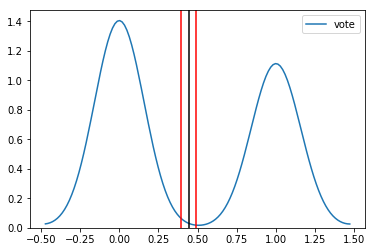

In [43]:
# PART 2
# Graphically represent the confidence interval

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.kdeplot(df['handicap'])

plt.axvline(hc[0], color='red')
plt.axvline(hc[1], color='black')
plt.axvline(hc[2], color='red')

plt.legend(labels=['vote'])
plt.show()

In [0]:
# PART 3
# Interpret the confidence interval

# The mean of the data was 0.44; in order to say
# that the results we would get from rerunning the
# "experiment" (ie, vote) are going to be within
# a fixed distance of this mean 95% of the time,
# we have to set that fixed distance to ~0.05

# To put it in simpler terms: If you ran this vote
# 100 times, then 95 of those times, the mean (the
# voting) will fall somewhere from 0.39 to 0.49
# (ie, "39% to 49% of Congress voted for it")

# And note well that the null hypothesis we tested
# was a simple 50/50, and 0.5 is outside of this
# confidence interval. So we can confidently reject
# the null hypothesis on this issue (ie, that
# politicians voted based on coin flip)

In [87]:
# PART 4
# Taking data that we've used in class before...

# Forest fires!
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df = pd.read_csv(data_url)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [97]:
# PART 4(a)
# ...run a chi-squared test
# ...BY HAND

import numpy as np
omfg = months + ['All']
ct = pd.crosstab(df['X'], df['month'], margins=True)
ct = ct[omfg]
ct

month,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,All
X,,,,,,,,,,,,,
1,0,0,1,0,0,0,3,22,22,0,0,0,48
2,1,3,3,0,0,1,4,41,19,1,0,0,73
3,0,2,11,0,0,2,3,17,17,2,0,1,55
4,1,3,13,1,1,1,5,22,36,2,0,6,91
5,0,2,5,1,0,0,1,9,12,0,0,0,30
6,0,5,13,6,1,5,2,16,35,1,1,1,86
7,0,3,4,1,0,2,7,17,20,6,0,0,60
8,0,0,4,0,0,3,2,38,10,3,0,1,61
9,0,2,0,0,0,3,5,2,1,0,0,0,13


In [98]:
col_sums = ct.iloc[9][0:12].values
row_sums = ct.iloc[:,12][0:9].values
total = ct.iloc[9:,12].values[0]
print(f"columns: {col_sums}\nrows: {row_sums}\ntotal: {total}")

columns: [  2  20  54   9   2  17  32 184 172  15   1   9]
rows: [48 73 55 91 30 86 60 61 13]
total: 517


In [99]:
exp = []
for i in range(len(row_sums)):
  exp_rows = []
  for c in col_sums:
    exp_val = c * row_sums[i] / total
    exp_rows.append(exp_val)
  exp.append(exp_rows)

exp = np.array(exp)
exp.shape

(9, 12)

In [104]:
obs = np.array(ct[0:9][months])
obs.shape

(9, 12)

In [105]:
chi_squared = ((obs - exp)**2 / exp).sum()
print(f"CHI SQUARED: {chi_squared}")

CHI SQUARED: 192.7840999957817


In [107]:
# PART 4(b)
# ...run a chi-squared test
# ...with scipy

chi_squared = stats.chi2_contingency(obs)[0]
print(f"...ACTUAL CHI SQUARED: {chi_squared}")

...ACTUAL CHI SQUARED: 192.7840999957817


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)